<a href="https://colab.research.google.com/github/Ramakrishnanewbie/Cats_and_Dogs_Classification/blob/main/Cats_and_Dogs_Clssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
_URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)

68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

In [ ]:
train_cats_dir=os.path.join(train_dir,'cats')

In [ ]:
train_dogs_dir=os.path.join(train_dir,'dogs')

In [ ]:
validation_cats_dir=os.path.join(validation_dir,'cats')

In [ ]:
validation_dog_dir=os.path.join(validation_dir,'dogs')

In [ ]:
Batch_size=100
img_shape=150

In [ ]:
def plotImages(images_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
image_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_gen=image_gen.flow_from_directory(batch_size=Batch_size,directory=train_dir,shuffle=True,target_size=(img_shape,img_shape))

Found 2000 images belonging to 2 classes.


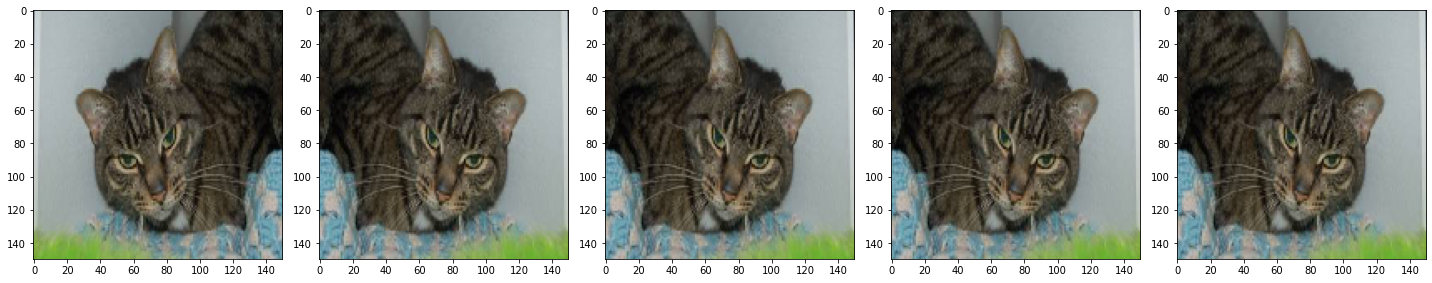

In [ ]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen=ImageDataGenerator(rescale=1./255,rotation_range=45)
train_data_gen=image_gen.flow_from_directory(batch_size=Batch_size,directory=train_dir,shuffle=True,target_size=(img_shape,img_shape))

Found 2000 images belonging to 2 classes.


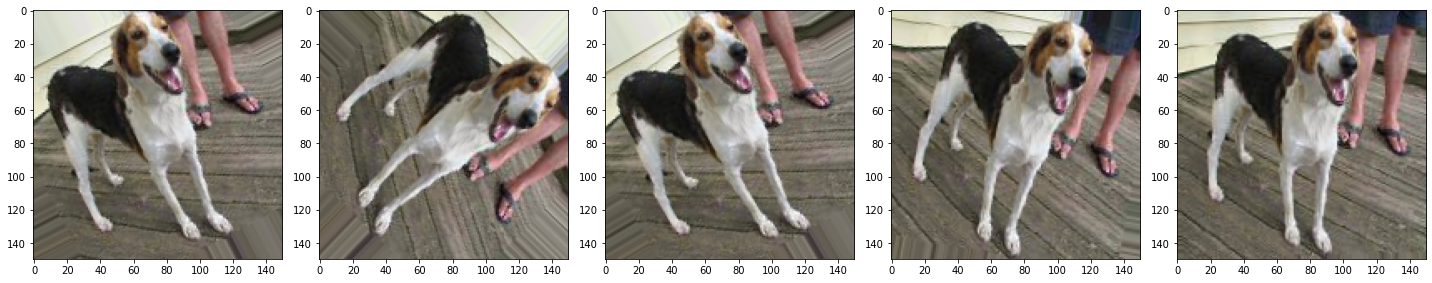

In [ ]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_data_gen=image_gen.flow_from_directory(batch_size=Batch_size,directory=train_dir,shuffle=True,target_size=(img_shape,img_shape))

Found 2000 images belonging to 2 classes.


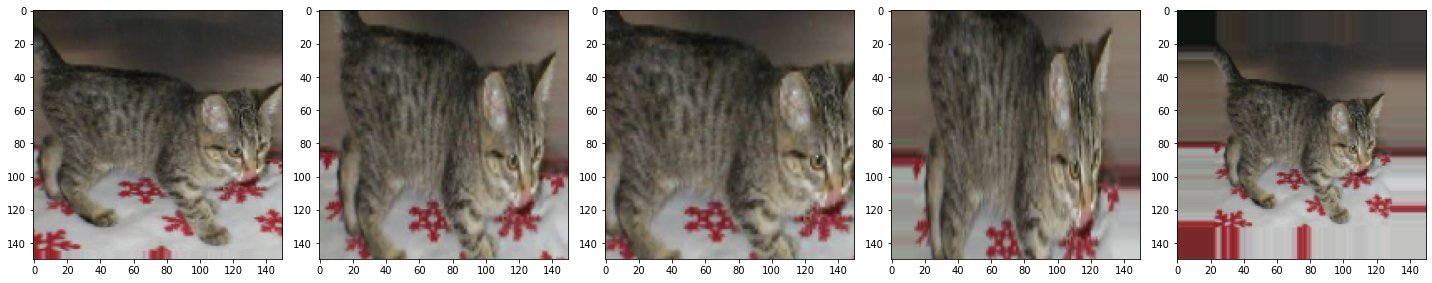

In [ ]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_train=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_data_gen=image_gen_train.flow_from_directory(batch_size=Batch_size,directory=train_dir,shuffle=True,target_size=(img_shape,img_shape),class_mode='binary')

Found 2000 images belonging to 2 classes.


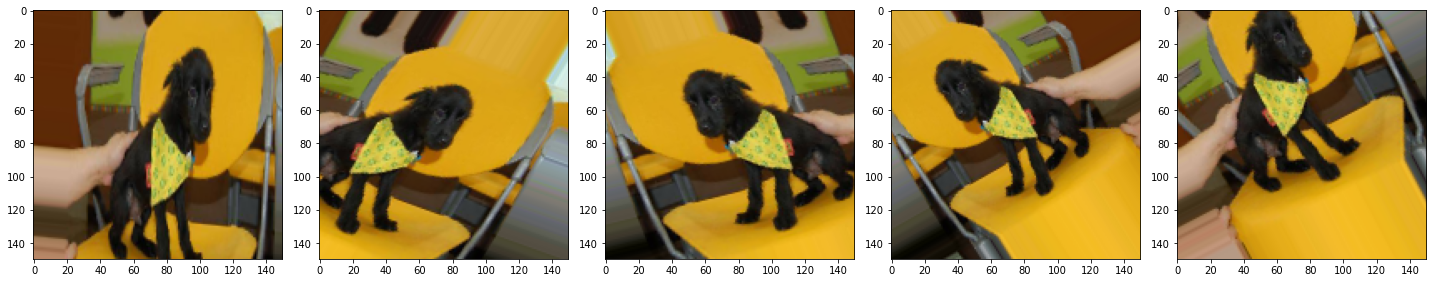

In [ ]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val=ImageDataGenerator(rescale=1./255)
val_data_gen=image_gen_val.flow_from_directory(batch_size=Batch_size,directory=validation_dir,target_size=(img_shape,img_shape),class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
     
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs=100
history=model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/100
20/20 [==============================] - 32s 1s/step - loss: 0.7197 - accuracy: 0.5060 - val_loss: 0.6927 - val_accuracy: 0.5320
Epoch 2/100
20/20 [==============================] - 17s 837ms/step - loss: 0.6929 - accuracy: 0.5105 - val_loss: 0.6908 - val_accuracy: 0.5030
Epoch 3/100
20/20 [==============================] - 17s 845ms/step - loss: 0.6907 - accuracy: 0.5190 - val_loss: 0.6860 - val_accuracy: 0.5170
Epoch 4/100
20/20 [==============================] - 17s 867ms/step - loss: 0.6862 - accuracy: 0.5520 - val_loss: 0.6866 - val_accuracy: 0.5190
Epoch 5/100
20/20 [==============================] - 18s 887ms/step - loss: 0.6836 - accuracy: 0.5525 - val_loss: 0.6641 - val_accuracy: 0.6190
Epoch 6/100
20/20 [==============================] - 17s 844ms/step - loss: 0.6754 - accuracy: 0.5795 - val_loss: 0.6645 - val_accuracy: 0.5610
Epoch 7/100
20/20 [==============================] - 17s 847ms/step - loss: 0.6474 - accuracy: 0.6260 - val_loss: 0.6370 - val_accuracy: 0.

In [ ]:
#plots

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()